In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df = df.drop(['Cabin', 'Ticket', 'Embarked', 'Name', 'PassengerId'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [ ]:
df['Sex'] = (df['Sex'] == 'male').astype(int)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [ ]:
df = df.dropna()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
889,1,1,1,26.0,0,0,30.0000


In [ ]:
import numpy as np
df_np = df.to_numpy()
x=df_np[:,1:]
y=df_np[:,0]

In [ ]:
print(x[:10])
print(f'y = {y[:10]}')

[[ 3.      1.     22.      1.      0.      7.25  ]
 [ 1.      0.     38.      1.      0.     71.2833]
 [ 3.      0.     26.      0.      0.      7.925 ]
 [ 1.      0.     35.      1.      0.     53.1   ]
 [ 3.      1.     35.      0.      0.      8.05  ]
 [ 1.      1.     54.      0.      0.     51.8625]
 [ 3.      1.      2.      3.      1.     21.075 ]
 [ 3.      0.     27.      0.      2.     11.1333]
 [ 2.      0.     14.      1.      0.     30.0708]
 [ 3.      0.      4.      1.      1.     16.7   ]]
y = [0. 1. 1. 1. 0. 0. 0. 1. 1. 1.]


In [ ]:
import collections
collections.Counter(y)

Counter({0.0: 424, 1.0: 290})

In [ ]:
from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((499, 6), (499,), (215, 6), (215,))

In [ ]:
np.set_printoptions(suppress=True)
print(X_train[:10])
print(f'y_train = {y_train[:10]}')

[[  1.       1.      62.       0.       0.      26.55  ]
 [  2.       1.      23.       0.       0.      10.5   ]
 [  3.       1.      20.       1.       1.      15.7417]
 [  3.       1.      47.       0.       0.       9.    ]
 [  3.       1.      30.       0.       0.       8.05  ]
 [  3.       1.      18.       1.       0.       6.4958]
 [  3.       1.       8.       4.       1.      29.125 ]
 [  1.       1.      35.       0.       0.      26.55  ]
 [  3.       1.      40.       1.       4.      27.9   ]
 [  1.       0.      25.       1.       2.     151.55  ]]
y_train = [0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier

# inizializziamo il metodo con n_neighbors=5
neigh = KNeighborsClassifier(n_neighbors=5)

# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

# proviamo a fare una previsione sui dati del test set
predictknn = neigh.predict(X_test)

In [ ]:
print(f'dati predetti dal metodo =                {predictknn[:10]}')
print(f'dati reali presenti nel dataset di test = {y_test[:10]}')

dati predetti dal metodo =                [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
dati reali presenti nel dataset di test = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
!pip install mlxtend

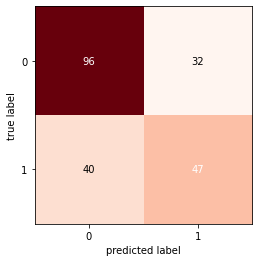

In [ ]:
# valutiamo il nostro metodo:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# visualizziamo la confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, predictknn), cmap=plt.cm.Reds)
plt.show()

In [ ]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predictknn))

              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73       128
         1.0       0.59      0.54      0.57        87

    accuracy                           0.67       215
   macro avg       0.65      0.65      0.65       215
weighted avg       0.66      0.67      0.66       215



In [ ]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn import tree

# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predictdt = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predictdt[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
dati reali presenti nel dataset di test = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


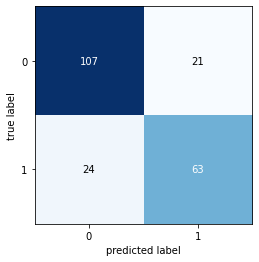

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predictdt))
plt.show()

In [ ]:
print(classification_report(y_test, predictdt))

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       128
         1.0       0.75      0.72      0.74        87

    accuracy                           0.79       215
   macro avg       0.78      0.78      0.78       215
weighted avg       0.79      0.79      0.79       215



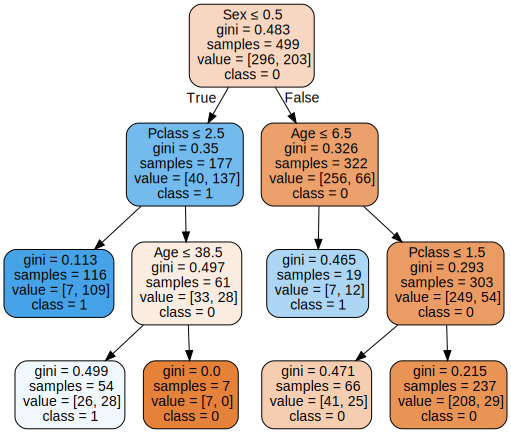

In [ ]:
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[1:7],  
                     class_names=['0','1'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('diabetes')
graph